# 🩺 Liver Disease Stage Prediction
This notebook builds a machine learning model to classify liver disease stages using clinical data.

## 📥 Load the Dataset
Importing required libraries and loading the dataset.

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('liver_cirrhosis.csv')

## 👀 Dataset Overview
Let's take a quick look at the dataset to understand its structure.

In [3]:
df 

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


## 🔍 Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

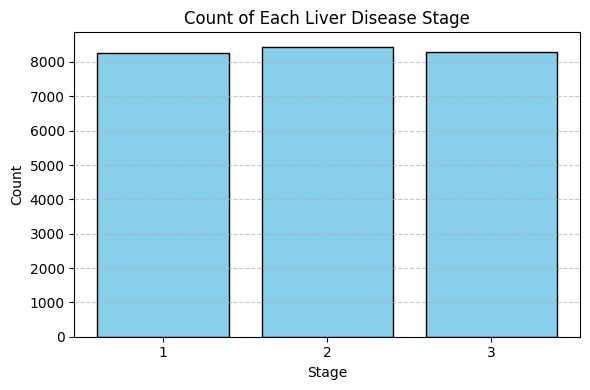

In [7]:
stage_counts = df['Stage'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(stage_counts.index, stage_counts.values, color='skyblue', edgecolor='black')
plt.title('Count of Each Liver Disease Stage')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(stage_counts.index)  # Ensure x-ticks match stages 1, 2, 3
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## ✂️ Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
train_df.shape

(20000, 19)

In [11]:
test_df.shape

(5000, 19)

## ✂️ Train-Test Split

In [12]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [14]:
val_df.shape

(4000, 19)

In [15]:
train_df.shape

(16000, 19)

In [25]:
input_cols = list(train_df.columns[:-1])
target_col = 'Stage'

In [26]:
input_cols

['N_Days',
 'Status',
 'Drug',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [27]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [28]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [50]:
test_inputs = test_df[input_cols]
test_targets = test_df[target_col]

In [30]:
import numpy as np

In [31]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [32]:
print(numeric_cols)

['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


In [33]:
print(categorical_cols)

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [34]:
from sklearn.preprocessing import OneHotEncoder

## 🤖 Model Training

In [35]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [36]:
encoded_cols

['Status_C',
 'Status_CL',
 'Status_D',
 'Drug_D-penicillamine',
 'Drug_Placebo',
 'Sex_F',
 'Sex_M',
 'Ascites_N',
 'Ascites_Y',
 'Hepatomegaly_N',
 'Hepatomegaly_Y',
 'Spiders_N',
 'Spiders_Y',
 'Edema_N',
 'Edema_S',
 'Edema_Y']

In [37]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [38]:
train_inputs.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
6911,1301,CL,D-penicillamine,22797,F,Y,Y,N,S,1.1,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
17960,935,D,Placebo,17897,F,Y,N,Y,N,4.2,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
13714,3672,C,D-penicillamine,13913,F,N,N,N,N,0.7,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
15813,1478,D,Placebo,16802,F,Y,N,Y,N,9.5,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
22169,2170,C,D-penicillamine,12636,F,N,N,N,N,0.5,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [40]:
X_train.head(5)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
6911,1301,22797,1.1,432.000000,3.57,45.000000,1406.000000,190.000000,77.000000,139.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
17960,935,17897,4.2,369.510563,3.19,97.648387,1982.655769,122.556346,124.702128,388.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
13714,3672,13913,0.7,204.000000,3.66,28.000000,685.000000,72.850000,58.000000,213.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
15813,1478,16802,9.5,369.510563,3.63,97.648387,1982.655769,122.556346,124.702128,419.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
22169,2170,12636,0.5,369.510563,3.89,29.000000,897.000000,66.650000,124.702128,423.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## 🤖 Model Training

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, train_targets)

RandomForestClassifier(random_state=42)

In [42]:
from sklearn.metrics import mean_squared_log_error

In [43]:
train_preds = rf_model.predict(X_train)
val_preds = rf_model.predict(X_val) 

In [48]:
mean_squared_log_error(train_targets, train_preds)

0.0009316108457055431

In [47]:
mean_squared_log_error(val_targets, val_preds)

0.01078462751784139

In [49]:
test_preds = rf_model.predict(X_test) 

In [53]:
mean_squared_log_error(test_targets, test_preds, squared=False)

0.09209926190243273

## ✅ Accuracy Calculation

In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_targets, test_preds) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 95.78%


## ✅ Accuracy Calculation

In [58]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(val_targets, val_preds) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 95.08%
